[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Denis-R-V/TSR/blob/main/main.ipynb)

In [18]:
import json
#import numpy as np 
import pandas as pd 
#import matplotlib.pyplot as plt

# Анализ датасета

### train_anno.json

In [19]:
with open('data/train_anno.json', 'r') as read_file:
    train_anno = json.load(read_file)
train_anno.keys()

dict_keys(['images', 'annotations', 'categories'])

In [20]:
display(train_anno.get('images')[47])
display(len(train_anno.get('images')))
display(train_anno.get('annotations')[82])
display(len(train_anno.get('annotations')))
display(train_anno.get('categories')[10])
display(len(train_anno.get('categories')))

{'id': 51,
 'width': 1280,
 'height': 720,
 'file_name': 'rtsd-frames/autosave01_02_2012_09_16_49.jpg'}

54188

{'id': 88,
 'image_id': 51,
 'category_id': 11,
 'area': 1813,
 'bbox': [826, 277, 37, 49],
 'iscrowd': 0}

95492

{'id': 11, 'name': '7_15'}

155

Файл *archive/train_anno.json* состоит из 3 списков:
- *images* содержит информацию о 54188 изображениях (метаданные - id, ширина, высота и путь к файлу);
- *annotations* содержит информацию о 95492 аннотациях (ограничивающие прямоугольники, классы объектов и т.д.);
- *categories* содержит информацию о 155 категориях классификации.  
Датасет представлен в формате Common Objects in Context (COCO)

### train_anno_reduced.json

In [21]:
with open('data/train_anno_reduced.json', 'r') as read_file:
    train_anno_reduced = json.load(read_file)
train_anno_reduced.keys()

dict_keys(['images', 'annotations', 'categories'])

In [22]:
display(train_anno_reduced.get('images')[0])
display(len(train_anno_reduced.get('images')))
display(train_anno_reduced.get('annotations')[0])
display(len(train_anno_reduced.get('annotations')))
display(train_anno_reduced.get('categories')[0])
display(len(train_anno_reduced.get('categories')))

{'id': 51,
 'width': 1280,
 'height': 720,
 'file_name': 'rtsd-frames/autosave01_02_2012_09_16_49.jpg'}

1889

{'id': 31193,
 'image_id': 18983,
 'category_id': 1,
 'area': 1023,
 'bbox': [754, 390, 31, 33],
 'iscrowd': 0}

2325

{'id': 1, 'name': '2_1'}

155

Файл *archive/train_anno_reduced.json* содержит подмножество *train_anno.json*

In [23]:
# Проверим, что все пути изображений файла archive/train_anno_reduced.json содержатся в файле train_anno.json
train_anno_images_set = []
for i in train_anno.get('images'):
    train_anno_images_set.append(i.get('file_name'))

train_anno_reduced_images_set = []
for i in train_anno_reduced.get('images'):
    train_anno_reduced_images_set.append(i.get('file_name'))

set(train_anno_images_set).issuperset(set(train_anno_reduced_images_set))

True

### val_anno.json

In [24]:
with open('data/val_anno.json', 'r') as read_file:
    val_anno = json.load(read_file)
val_anno.keys()

dict_keys(['images', 'annotations', 'categories'])

In [25]:
display(val_anno.get('images')[0])
display(len(val_anno.get('images')))
display(val_anno.get('annotations')[0])
display(len(val_anno.get('annotations')))
display(val_anno.get('categories')[2])
display(len(val_anno.get('categories')))

{'id': 22978,
 'width': 1280,
 'height': 720,
 'file_name': 'rtsd-frames/autosave10_10_2012_13_50_36_1.jpg'}

5000

{'id': 37471,
 'image_id': 22978,
 'category_id': 3,
 'area': 810,
 'bbox': [622, 375, 30, 27],
 'iscrowd': 0}

8866

{'id': 3, 'name': '1_17'}

155

In [26]:
# Проверим пересечания изображений, пути которых содержатся в файлах train_anno.json и val_anno.json
train_anno_images_set = []
for i in train_anno.get('images'):
    train_anno_images_set.append(i.get('file_name'))

val_anno_images_set = []
for i in val_anno.get('images'):
    val_anno_images_set.append(i.get('file_name'))

set(train_anno_images_set).isdisjoint(set(val_anno_images_set))

True

Множества изображений, пути которых содержатся в файлах *train_anno.json* и *val_anno.json* не пересекаются

### train_anno.json

In [27]:
with open('data/label_map.json', 'r') as read_file:
    label_map = json.load(read_file)
label_map

{'2_1': 1,
 '1_23': 2,
 '1_17': 3,
 '3_24': 4,
 '8_2_1': 5,
 '5_20': 6,
 '5_19_1': 7,
 '5_16': 8,
 '3_25': 9,
 '6_16': 10,
 '7_15': 11,
 '2_2': 12,
 '2_4': 13,
 '8_13_1': 14,
 '4_2_1': 15,
 '1_20_3': 16,
 '1_25': 17,
 '3_4': 18,
 '8_3_2': 19,
 '3_4_1': 20,
 '4_1_6': 21,
 '4_2_3': 22,
 '4_1_1': 23,
 '1_33': 24,
 '5_15_5': 25,
 '3_27': 26,
 '1_15': 27,
 '4_1_2_1': 28,
 '6_3_1': 29,
 '8_1_1': 30,
 '6_7': 31,
 '5_15_3': 32,
 '7_3': 33,
 '1_19': 34,
 '6_4': 35,
 '8_1_4': 36,
 '8_8': 37,
 '1_16': 38,
 '1_11_1': 39,
 '6_6': 40,
 '5_15_1': 41,
 '7_2': 42,
 '5_15_2': 43,
 '7_12': 44,
 '3_18': 45,
 '5_6': 46,
 '5_5': 47,
 '7_4': 48,
 '4_1_2': 49,
 '8_2_2': 50,
 '7_11': 51,
 '1_22': 52,
 '1_27': 53,
 '2_3_2': 54,
 '5_15_2_2': 55,
 '1_8': 56,
 '3_13': 57,
 '2_3': 58,
 '8_3_3': 59,
 '2_3_3': 60,
 '7_7': 61,
 '1_11': 62,
 '8_13': 63,
 '1_12_2': 64,
 '1_20': 65,
 '1_12': 66,
 '3_32': 67,
 '2_5': 68,
 '3_1': 69,
 '4_8_2': 70,
 '3_20': 71,
 '3_2': 72,
 '2_3_6': 73,
 '5_22': 74,
 '5_18': 75,
 '2_3_5': 7

Файл *archive/label_map.json* содержит номера дорожных знаков (по ГОСТ) и соответствующие ему ID категорий в датасете

### labels.txt

In [28]:
with open('data/label_map.json', 'r') as read_file:
    label_map = json.load(read_file)
label_map

{'2_1': 1,
 '1_23': 2,
 '1_17': 3,
 '3_24': 4,
 '8_2_1': 5,
 '5_20': 6,
 '5_19_1': 7,
 '5_16': 8,
 '3_25': 9,
 '6_16': 10,
 '7_15': 11,
 '2_2': 12,
 '2_4': 13,
 '8_13_1': 14,
 '4_2_1': 15,
 '1_20_3': 16,
 '1_25': 17,
 '3_4': 18,
 '8_3_2': 19,
 '3_4_1': 20,
 '4_1_6': 21,
 '4_2_3': 22,
 '4_1_1': 23,
 '1_33': 24,
 '5_15_5': 25,
 '3_27': 26,
 '1_15': 27,
 '4_1_2_1': 28,
 '6_3_1': 29,
 '8_1_1': 30,
 '6_7': 31,
 '5_15_3': 32,
 '7_3': 33,
 '1_19': 34,
 '6_4': 35,
 '8_1_4': 36,
 '8_8': 37,
 '1_16': 38,
 '1_11_1': 39,
 '6_6': 40,
 '5_15_1': 41,
 '7_2': 42,
 '5_15_2': 43,
 '7_12': 44,
 '3_18': 45,
 '5_6': 46,
 '5_5': 47,
 '7_4': 48,
 '4_1_2': 49,
 '8_2_2': 50,
 '7_11': 51,
 '1_22': 52,
 '1_27': 53,
 '2_3_2': 54,
 '5_15_2_2': 55,
 '1_8': 56,
 '3_13': 57,
 '2_3': 58,
 '8_3_3': 59,
 '2_3_3': 60,
 '7_7': 61,
 '1_11': 62,
 '8_13': 63,
 '1_12_2': 64,
 '1_20': 65,
 '1_12': 66,
 '3_32': 67,
 '2_5': 68,
 '3_1': 69,
 '4_8_2': 70,
 '3_20': 71,
 '3_2': 72,
 '2_3_6': 73,
 '5_22': 74,
 '5_18': 75,
 '2_3_5': 7

In [29]:
with open('data/labels.txt', 'r') as read_file:
    labels = read_file.read()
read_file.close()
labels

'2_1\n1_23\n1_17\n3_24\n8_2_1\n5_20\n5_19_1\n5_16\n3_25\n6_16\n7_15\n2_2\n2_4\n8_13_1\n4_2_1\n1_20_3\n1_25\n3_4\n8_3_2\n3_4_1\n4_1_6\n4_2_3\n4_1_1\n1_33\n5_15_5\n3_27\n1_15\n4_1_2_1\n6_3_1\n8_1_1\n6_7\n5_15_3\n7_3\n1_19\n6_4\n8_1_4\n8_8\n1_16\n1_11_1\n6_6\n5_15_1\n7_2\n5_15_2\n7_12\n3_18\n5_6\n5_5\n7_4\n4_1_2\n8_2_2\n7_11\n1_22\n1_27\n2_3_2\n5_15_2_2\n1_8\n3_13\n2_3\n8_3_3\n2_3_3\n7_7\n1_11\n8_13\n1_12_2\n1_20\n1_12\n3_32\n2_5\n3_1\n4_8_2\n3_20\n3_2\n2_3_6\n5_22\n5_18\n2_3_5\n7_5\n8_4_1\n3_14\n1_2\n1_20_2\n4_1_4\n7_6\n8_1_3\n8_3_1\n4_3\n4_1_5\n8_2_3\n8_2_4\n1_31\n3_10\n4_2_2\n7_1\n3_28\n4_1_3\n5_4\n5_3\n6_8_2\n3_31\n6_2\n1_21\n3_21\n1_13\n1_14\n2_3_4\n4_8_3\n6_15_2\n2_6\n3_18_2\n4_1_2_2\n1_7\n3_19\n1_18\n2_7\n8_5_4\n5_15_7\n5_14\n5_21\n1_1\n6_15_1\n8_6_4\n8_15\n4_5\n3_11\n8_18\n8_4_4\n3_30\n5_7_1\n5_7_2\n1_5\n3_29\n6_15_3\n5_12\n3_16\n1_30\n5_11\n1_6\n8_6_2\n6_8_3\n3_12\n3_33\n8_4_3\n5_8\n8_14\n8_17\n3_6\n1_26\n8_5_2\n6_8_1\n5_17\n1_10\n8_16\n7_18\n7_14\n8_23\n'

Файл *archive/labels.txt* содержит номера дорожных знаков (по ГОСТ)

## Распределение дорожных знаков в выборках

In [30]:
labels = labels.split('\n')
labels

['2_1',
 '1_23',
 '1_17',
 '3_24',
 '8_2_1',
 '5_20',
 '5_19_1',
 '5_16',
 '3_25',
 '6_16',
 '7_15',
 '2_2',
 '2_4',
 '8_13_1',
 '4_2_1',
 '1_20_3',
 '1_25',
 '3_4',
 '8_3_2',
 '3_4_1',
 '4_1_6',
 '4_2_3',
 '4_1_1',
 '1_33',
 '5_15_5',
 '3_27',
 '1_15',
 '4_1_2_1',
 '6_3_1',
 '8_1_1',
 '6_7',
 '5_15_3',
 '7_3',
 '1_19',
 '6_4',
 '8_1_4',
 '8_8',
 '1_16',
 '1_11_1',
 '6_6',
 '5_15_1',
 '7_2',
 '5_15_2',
 '7_12',
 '3_18',
 '5_6',
 '5_5',
 '7_4',
 '4_1_2',
 '8_2_2',
 '7_11',
 '1_22',
 '1_27',
 '2_3_2',
 '5_15_2_2',
 '1_8',
 '3_13',
 '2_3',
 '8_3_3',
 '2_3_3',
 '7_7',
 '1_11',
 '8_13',
 '1_12_2',
 '1_20',
 '1_12',
 '3_32',
 '2_5',
 '3_1',
 '4_8_2',
 '3_20',
 '3_2',
 '2_3_6',
 '5_22',
 '5_18',
 '2_3_5',
 '7_5',
 '8_4_1',
 '3_14',
 '1_2',
 '1_20_2',
 '4_1_4',
 '7_6',
 '8_1_3',
 '8_3_1',
 '4_3',
 '4_1_5',
 '8_2_3',
 '8_2_4',
 '1_31',
 '3_10',
 '4_2_2',
 '7_1',
 '3_28',
 '4_1_3',
 '5_4',
 '5_3',
 '6_8_2',
 '3_31',
 '6_2',
 '1_21',
 '3_21',
 '1_13',
 '1_14',
 '2_3_4',
 '4_8_3',
 '6_15_2',
 '2_6

In [31]:
# Проверим, что словари id-номер знака совпадают для разных выборок
for i in range(len(train_anno.get('categories'))):
    if (train_anno.get('categories')[i] == train_anno_reduced.get('categories')[i]) and \
    (train_anno.get('categories')[i] == val_anno.get('categories')[i]):
        pass
    else:
        print(f'Элементы {i} выборок не совпадают')

In [32]:
category_ids = []
for i in train_anno.get('categories'):
    category_ids.append(i.get('id'))
category_ids

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155]

In [33]:
# Формируем словарь, в котором ключи равны уникальным значениям в списке, а значения равны 0
train_signs_distribution = dict.fromkeys(category_ids, 0)
# Для каждого появления знака
for i in train_anno.get('annotations'):
    # Увеличиваем значение появлений знака этой категории на 1
    train_signs_distribution[i.get('category_id')] += 1
# Сформируем датафрейм с номером знака по ГОСТ и частотой его появления
train_signs_distribution_df  = pd.DataFrame([train_signs_distribution]).T
train_signs_distribution_df = train_signs_distribution_df.merge(pd.DataFrame([label_map]).T.reset_index().set_index(0),
                                                                left_index=True, right_index=True)
train_signs_distribution_df = train_signs_distribution_df[['index', 0]]
train_signs_distribution_df.rename(columns={'index':'sign', 0:'frequently'}, inplace=True)
train_signs_distribution_df

,sign,frequently
1,2_1,10027
2,1_23,2558
3,1_17,1149
4,3_24,3761
5,8_2_1,933
...,...,...
151,1_10,18
152,8_16,3
153,7_18,5
154,7_14,7


In [34]:
# Формируем словарь, в котором ключи равны уникальным значениям в списке, а значения равны 0
train_reduced_signs_distribution = dict.fromkeys(category_ids, 0)
# Для каждого появления знака
for i in train_anno_reduced.get('annotations'):
    # Увеличиваем значение появлений знака этой категории на 1
    train_reduced_signs_distribution[i.get('category_id')] += 1
train_reduced_signs_distribution
# Сформируем датафрейм с номером знака по ГОСТ и частотой его появления
train_reduced_signs_distribution_df  = pd.DataFrame([train_reduced_signs_distribution]).T
train_reduced_signs_distribution_df = train_reduced_signs_distribution_df.merge(pd.DataFrame([label_map]).T.reset_index().set_index(0),
                                                                                left_index=True, right_index=True)
train_reduced_signs_distribution_df = train_reduced_signs_distribution_df[['index', 0]]
train_reduced_signs_distribution_df.rename(columns={'index':'sign', 0:'frequently'}, inplace=True)
train_reduced_signs_distribution_df

,sign,frequently
1,2_1,15
2,1_23,15
3,1_17,15
4,3_24,15
5,8_2_1,15
...,...,...
151,1_10,15
152,8_16,15
153,7_18,15
154,7_14,15


In [35]:
# Формируем словарь, в котором ключи равны уникальным значениям в списке, а значения равны 0
val_signs_distribution = dict.fromkeys(category_ids, 0)
# Для каждого появления знака
for i in train_anno.get('annotations'):
    # Увеличиваем значение появлений знака этой категории на 1
    val_signs_distribution[i.get('category_id')] += 1
# Сформируем датафрейм с номером знака по ГОСТ и частотой его появления
val_signs_distribution_df  = pd.DataFrame([val_signs_distribution]).T
val_signs_distribution_df = val_signs_distribution_df.merge(pd.DataFrame([label_map]).T.reset_index().set_index(0),
                                                                left_index=True, right_index=True)
val_signs_distribution_df = val_signs_distribution_df[['index', 0]]
val_signs_distribution_df.rename(columns={'index':'sign', 0:'frequently'}, inplace=True)
val_signs_distribution_df

,sign,frequently
1,2_1,10027
2,1_23,2558
3,1_17,1149
4,3_24,3761
5,8_2_1,933
...,...,...
151,1_10,18
152,8_16,3
153,7_18,5
154,7_14,7


## Визуализация датасета

In [1]:
import fiftyone as fo

Migrating database to v0.18.0


In [4]:
dataset = fo.Dataset("/data")

In [7]:
dir(dataset)

['_FRAMES_PREFIX',
 '_GROUPS_PREFIX',
 '__add__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_group_field',
 '_add_implied_frame_field',
 '_add_implied_sample_field',
 '_add_samples_batch',
 '_add_view_stage',
 '_aggregate',
 '_annotation_cache',
 '_apply_field_schema',
 '_apply_frame_field_schema',
 '_async_aggregate',
 '_attach_frames_pipeline',
 '_attach_groups_pipeline',
 '_brain_cache',
 '_build_aggregation',
 '_build_batch_pipeline',
 '_build_big_pipeline',
 '_build_facets',
 '_bulk_write',
 '_clear',
 '_clear_frame_fields',
 '_clear_fram

In [13]:
dataset.histogram_values

<bound method SampleCollection.histogram_values of Name:        /data
Media type:  None
Num samples: 0
Persistent:  False
Tags:        []
Sample fields:
    id:       fiftyone.core.fields.ObjectIdField
    filepath: fiftyone.core.fields.StringField
    tags:     fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.Metadata)>

In [42]:
from pycocotools.coco import COCO

In [43]:
train_anno_file = 'data/train_anno.json'
train_anno_coco = COCO(train_anno_file)

loading annotations into memory...
Done (t=0.53s)
creating index...
index created!


In [44]:
# идентификатор категории
train_anno_coco.getCatIds(['2_1'])

[1]

In [45]:
# ID изображения указанной категории
train_anno_coco.getImgIds(catIds=[1])

[0,
 1,
 2,
 3,
 4,
 32768,
 32769,
 32770,
 32771,
 32772,
 32773,
 49,
 50,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 32884,
 32885,
 32888,
 32889,
 32890,
 32891,
 32892,
 32893,
 32894,
 32895,
 32896,
 131,
 132,
 134,
 135,
 136,
 138,
 139,
 156,
 157,
 158,
 33013,
 33014,
 33015,
 33016,
 33018,
 33019,
 33020,
 33021,
 303,
 304,
 306,
 307,
 308,
 309,
 310,
 311,
 321,
 322,
 326,
 328,
 334,
 335,
 336,
 337,
 338,
 339,
 340,
 33140,
 33141,
 33143,
 33144,
 33145,
 387,
 388,
 389,
 390,
 392,
 398,
 402,
 403,
 405,
 406,
 407,
 412,
 413,
 414,
 421,
 422,
 423,
 424,
 425,
 426,
 427,
 33198,
 33199,
 33200,
 33201,
 33202,
 33203,
 33205,
 452,
 468,
 469,
 470,
 480,
 481,
 483,
 484,
 485,
 486,
 487,
 488,
 489,
 490,
 491,
 492,
 494,
 495,
 496,
 497,
 504,
 505,
 506,
 507,
 513,
 514,
 515,
 33285,
 33286,
 33287,
 33288,
 33289,
 33290,
 33291,
 33294,
 33295,
 33296,
 33297,
 33298,
 531,
 33299,
 33300,
 549,
 550,
 553,
 

In [54]:
# ID аннотации с указанными ID изображения и ID категории
annotation_ids = train_anno_coco.getAnnIds(imgIds=95, catIds=[1])
annotation_ids

[176]

In [57]:
# загрузка аннотаций в список
annotation_ids = train_anno_coco.getAnnIds(imgIds=95, catIds=[1])
anns = train_anno_coco.loadAnns(annotation_ids)

In [58]:
for ann in anns:
    print(ann['bbox'])

[673, 297, 33, 35]


In [59]:
image_id=95


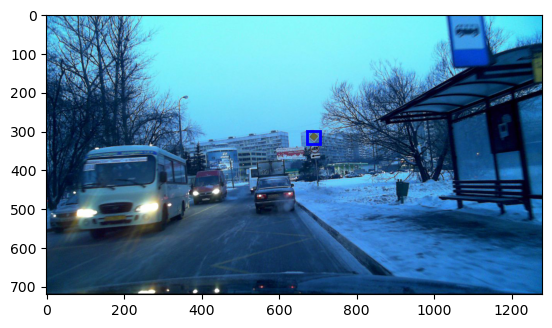

In [61]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
 
image_id = 95
 
images_path = "data/rtsd-frames/"
#image_name = str(image_id).zfill(12)+".jpg" # Image names are 12 characters long
image_name = train_anno_coco.imgs.get(image_id).get('file_name')
image = Image.open(images_path+image_name)
 
fig, ax = plt.subplots()
 
# Draw boxes and add label to each box
for ann in anns:
    box = ann['bbox']
    bb = patches.Rectangle((box[0],box[1]), box[2],box[3], linewidth=2, edgecolor="blue", facecolor="none")
    ax.add_patch(bb)
 
ax.imshow(image)
plt.show()

In [36]:
def plot_class_percent_bar(fig, series_class_counts, 
                           title: str, xlabel: str, ylabel: str, fig_name: str,
                           fontsize: int=12,
                           color='lightseagreen', edgecolor='lightseagreen'):
    plt.tight_layout()
    plt.style.use(['classic'])  # 'classic' | 'dark_background'
    fig.set_facecolor('w')
    
    bars = series_class_counts.plot.bar(color=color, edgecolor=edgecolor)

    totals = []
    for bar in bars.patches:
        totals.append(bar.get_height())
    total = sum(totals)

    ymin, ymax = bars.get_ylim()
    bars.set_ylim(top=ymax*1.1)

    # set individual bar lables using above list
    for bar in bars.patches:
        bar_height = bar.get_height()
        plt.text(bar.get_x(), bar_height + ymax*0.02,
                str(round((bar_height/total)*100, 2)) + "%",
                fontsize=fontsize, color=color, rotation=90)
        
    plt.title(title, color='k', fontsize=20)
    plt.xlabel(xlabel, color='k', fontsize=16)
    plt.ylabel(ylabel, color='k', fontsize=16)
    try:
        fig.savefig(fig_name)
        print(f"Saved to the: {fig_name}")
    except Exception as e:
        print('ERROR: Unsuccessfull saving')
        print(e)

In [37]:

results_path = '/content/drive/My Drive/Colab Notebooks/Results/CourseWork/EN'
r1_path = '/content/RTSD classification/rtsd-r1/'

classes_names_df_r1 = pd.ExcelFile('/content/drive/My Drive/Colab Notebooks/Bases/numbers_to_classes.xlsx')
# classes_names_df_r1 = pd.ExcelFile(r1_path + 'numbers_to_classes.xlsx')
classes_names_df_r1 = classes_names_df_r1.parse(sheet_name=0)
print("Examples of classes names of RTSD-r1:")
display(classes_names_df_r1.head(2))
display(classes_names_df_r1.tail(2))

n_classes = classes_names_df_r1['class_number'].count()
print("\nNumber of classes in RTSD-r1: " + str(n_classes))  # -> 67

labels_df = pd.ExcelFile(r1_path + 'gt_data.xlsx')
labels_df = labels_df.parse(sheet_name=0)
labels_df['filename'] = r1_path + 'train/' + labels_df['filename']
r1_class_counts = labels_df['class_number'].value_counts()
print(f'Shape of RTSD-r1 labels DataFrame: {labels_df.shape}')


fig = plt.figure(figsize=(20, 6))
title = 'RTSD-r1: Number of classes in RTSD-r1'
xlabel = 'Traffic sign class number'
ylabel = 'Number of images'
fig_name = results_path + '/r1_base_en.png'
plot_class_percent_bar(fig, r1_class_counts, title, xlabel, ylabel, fig_name)

# ------------------------------------------------------------------------------

r3_path = '/content/RTSD classification/rtsd-r3/'
classes_names_df_r3 = pd.read_csv(r3_path + 'numbers_to_classes.csv')
# classes_names_df_r3 = pd.ExcelFile(r3_path + 'numbers_to_classes.xlsx')
# classes_names_df_r3 = classes_names_df_r3.parse(sheet_name=0)
print("\nExamples of classes names of RTSD-r3:")
display(classes_names_df_r3.head(2))
display(classes_names_df_r3.tail(2))

n_classes_r3 = classes_names_df_r3['class_number'].count()
print("\nNumber of classes in RTSD-r3: " + str(n_classes_r3))  # -> 106

labels_df_r3 = pd.ExcelFile(r3_path + 'gt_data.xlsx')
labels_df_r3 = labels_df_r3.parse(sheet_name=0)
labels_df_r3['filename'] = r3_path + 'train/' + labels_df_r3['filename']
print(f'Shape of RTSD-r3 labels DataFrame: {labels_df_r3.shape}')
r3_class_counts = labels_df_r3['class_number'].value_counts()

fig = plt.figure(figsize=(23, 6))
title = 'RTSD-r3: Number of classes in RTSD-r1'
xlabel = 'Traffic sign class number'
ylabel = 'Number of images'
fig_name = results_path + '/r3_base_en.png'
plot_class_percent_bar(fig, r3_class_counts, title, xlabel, ylabel, fig_name, fontsize=10)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks/Bases/numbers_to_classes.xlsx'